# Classification - Communicating Performance to Business 

## 1) Import & Prepare Data

In [1]:
import pandas as pd
churn = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/churn.csv")

path = "C:/Users/IBlohm/Universität St.Gallen/IWI7 - Dokumente/CAS/2022/Notebooks/3_01 Intro Classication/CASBDAI_Module3_Day1_Classification/"

### Check Structure of Data

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4863 non-null   int64  
 1   annualincome         4863 non-null   int64  
 2   calldroprate         4863 non-null   float64
 3   callfailurerate      4863 non-null   float64
 4   customersuspended    4863 non-null   object 
 5   education            4863 non-null   object 
 6   gender               4863 non-null   object 
 7   homeowner            4863 non-null   object 
 8   maritalstatus        4863 non-null   object 
 9   monthlybilledamount  4863 non-null   int64  
 10  complaints           4863 non-null   int64  
 11  unpaidmonths         4863 non-null   int64  
 12  timetoexpiration     4863 non-null   int64  
 13  occupation           4863 non-null   object 
 14  penaltytoswitch      4863 non-null   int64  
 15  lastmonthusage       4863 non-null   i

### Separate Features and Labels

In [4]:
X = churn.drop("churn",axis=1) # Features
y = churn["churn"] # Target variable

### Dummy code pandas "objects"

In [5]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,annualincome,calldroprate,callfailurerate,monthlybilledamount,complaints,unpaidmonths,timetoexpiration,penaltytoswitch,lastmonthusage,...,education_High School or below,education_Master or equivalent,education_PhD or equivalent,gender_Male,homeowner_Yes,maritalstatus_Single,occupation_Others,occupation_Technology Related Job,usesinternetservice_Yes,usesvoiceservice_Yes
0,40,211044,0.05,0.00,47,3,6,76,92,161,...,1,0,0,0,1,0,0,1,0,0
1,33,130019,0.06,0.02,3,2,6,62,230,43,...,0,0,0,1,1,0,0,1,0,0
2,17,189354,0.03,0.00,103,0,7,99,382,420,...,1,0,0,0,1,1,0,1,0,0
3,70,180563,0.03,0.02,63,3,2,18,30,93,...,1,0,0,1,1,1,1,0,0,0
4,18,1460,0.06,0.01,58,1,3,99,238,200,...,1,0,0,1,1,1,1,0,0,1


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                4863 non-null   int64  
 1   annualincome                       4863 non-null   int64  
 2   calldroprate                       4863 non-null   float64
 3   callfailurerate                    4863 non-null   float64
 4   monthlybilledamount                4863 non-null   int64  
 5   complaints                         4863 non-null   int64  
 6   unpaidmonths                       4863 non-null   int64  
 7   timetoexpiration                   4863 non-null   int64  
 8   penaltytoswitch                    4863 non-null   int64  
 9   lastmonthusage                     4863 non-null   int64  
 10  unpaidbalance                      4863 non-null   int64  
 11  outsidecalls                       4863 non-null   float

## 2) Create Test & Training Data


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


*   **X:** Features to be split into testing and training data
*   **y:** Labels to be split into testing and training data
*   **test_size:** proportion of the dataset in the test data; usually ~ 30%
*   **random_state:** seed for making results reproducible. Instances are randomly distributed among testing and training data. However, every computer splits randomly in a different fashion. Providing a seed, makes results reproducible because with the same seed, all computers split the data in the same fashion.




## 3) Import, Initiate, and Train Models

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
tree_educatedguess = DecisionTreeClassifier(criterion="entropy",
                              max_depth=30,
                              min_samples_leaf=50,
                              random_state=12)
tree_educatedguess.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=50,
                       random_state=12)

In [11]:
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [12]:
boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5)
boost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=1000)

# Evaluating Model Performance the Business Way

## Lift Curve

In [13]:
def plot_lift_curve(y_val, y_pred):
    """ calculation and plotting of model lift """
    
    from pandas import DataFrame
    from numpy import ceil, arange
    import matplotlib.pyplot as plt
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = DataFrame()
    aux_lift['true'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    
    #Create the values that will go into the X axis of our plot
    xval = arange(0.01,1.01,0.01) #create sequnence of values from 0.01 to 1.00 in steps of 0.01
    lift = [] #create empty list for storing lift values
    
    #Calculate the total ratio of true events in the data
    ratio_true_events_total = aux_lift['true'].sum() / len(aux_lift)
    
    #Calculate lift for each x value its correspondent y value
    for x in xval:
        index_xval = int(ceil(x*len(aux_lift))) #get index at specific value of x
        dataframe_xval = aux_lift.iloc[:index_xval,:]   #subset dataframe from 0 to index_val
        lift_xval = dataframe_xval['true'].sum()/len(dataframe_xval) #calculate lift for subset
        lift.append(lift_xval / ratio_true_events_total) #store results
    
    #Build results dataframe
    lift = DataFrame({"Lift":lift, "ProportionSample":xval})
    
    #Create plot
    fig, ax = plt.subplots(figsize = (13,5), dpi=300)
    ax.plot(lift["ProportionSample"],lift["Lift"], color='green', linewidth = 3, label = "Model")
    ax.plot([0,1],[1,1],color="grey", label="Baseline")
    ax.set_xlabel('\nProportion of sample', fontsize=13)
    ax.set_ylabel('Lift\n', fontsize=13)
    ax.set_title('Lift Curve\n', fontsize=15)
    ax.xaxis.set_tick_params(labelsize=11)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.legend()
    plt.show()

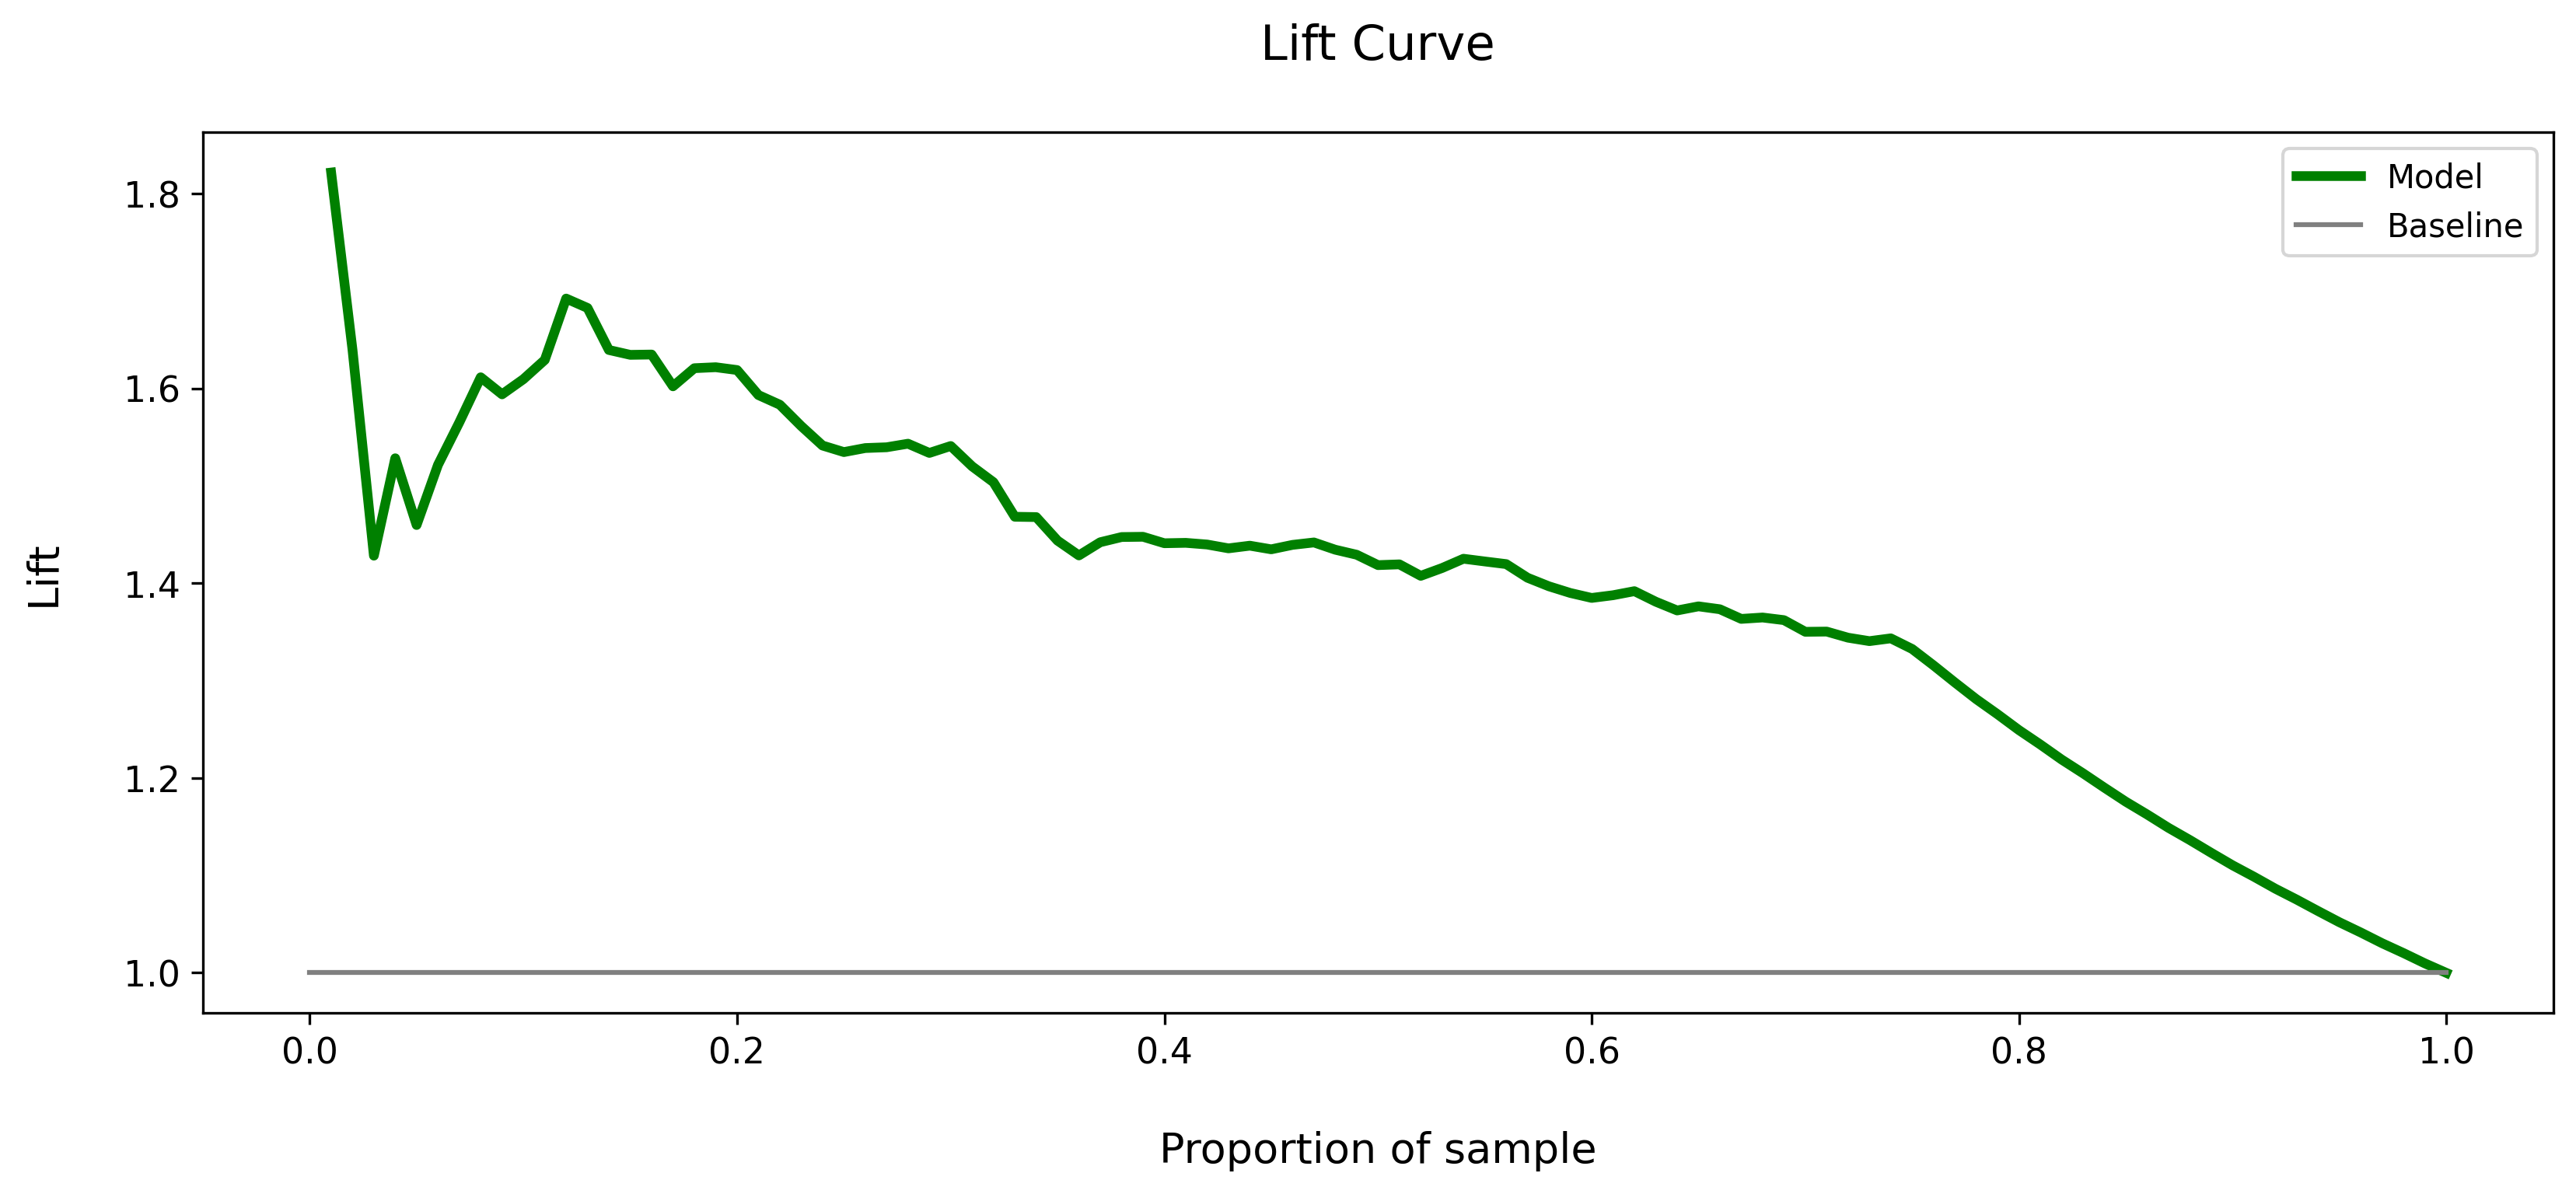

In [14]:
y_pred = tree_educatedguess.predict_proba(X_test)
plot_lift_curve(y_test, y_pred[:,1])

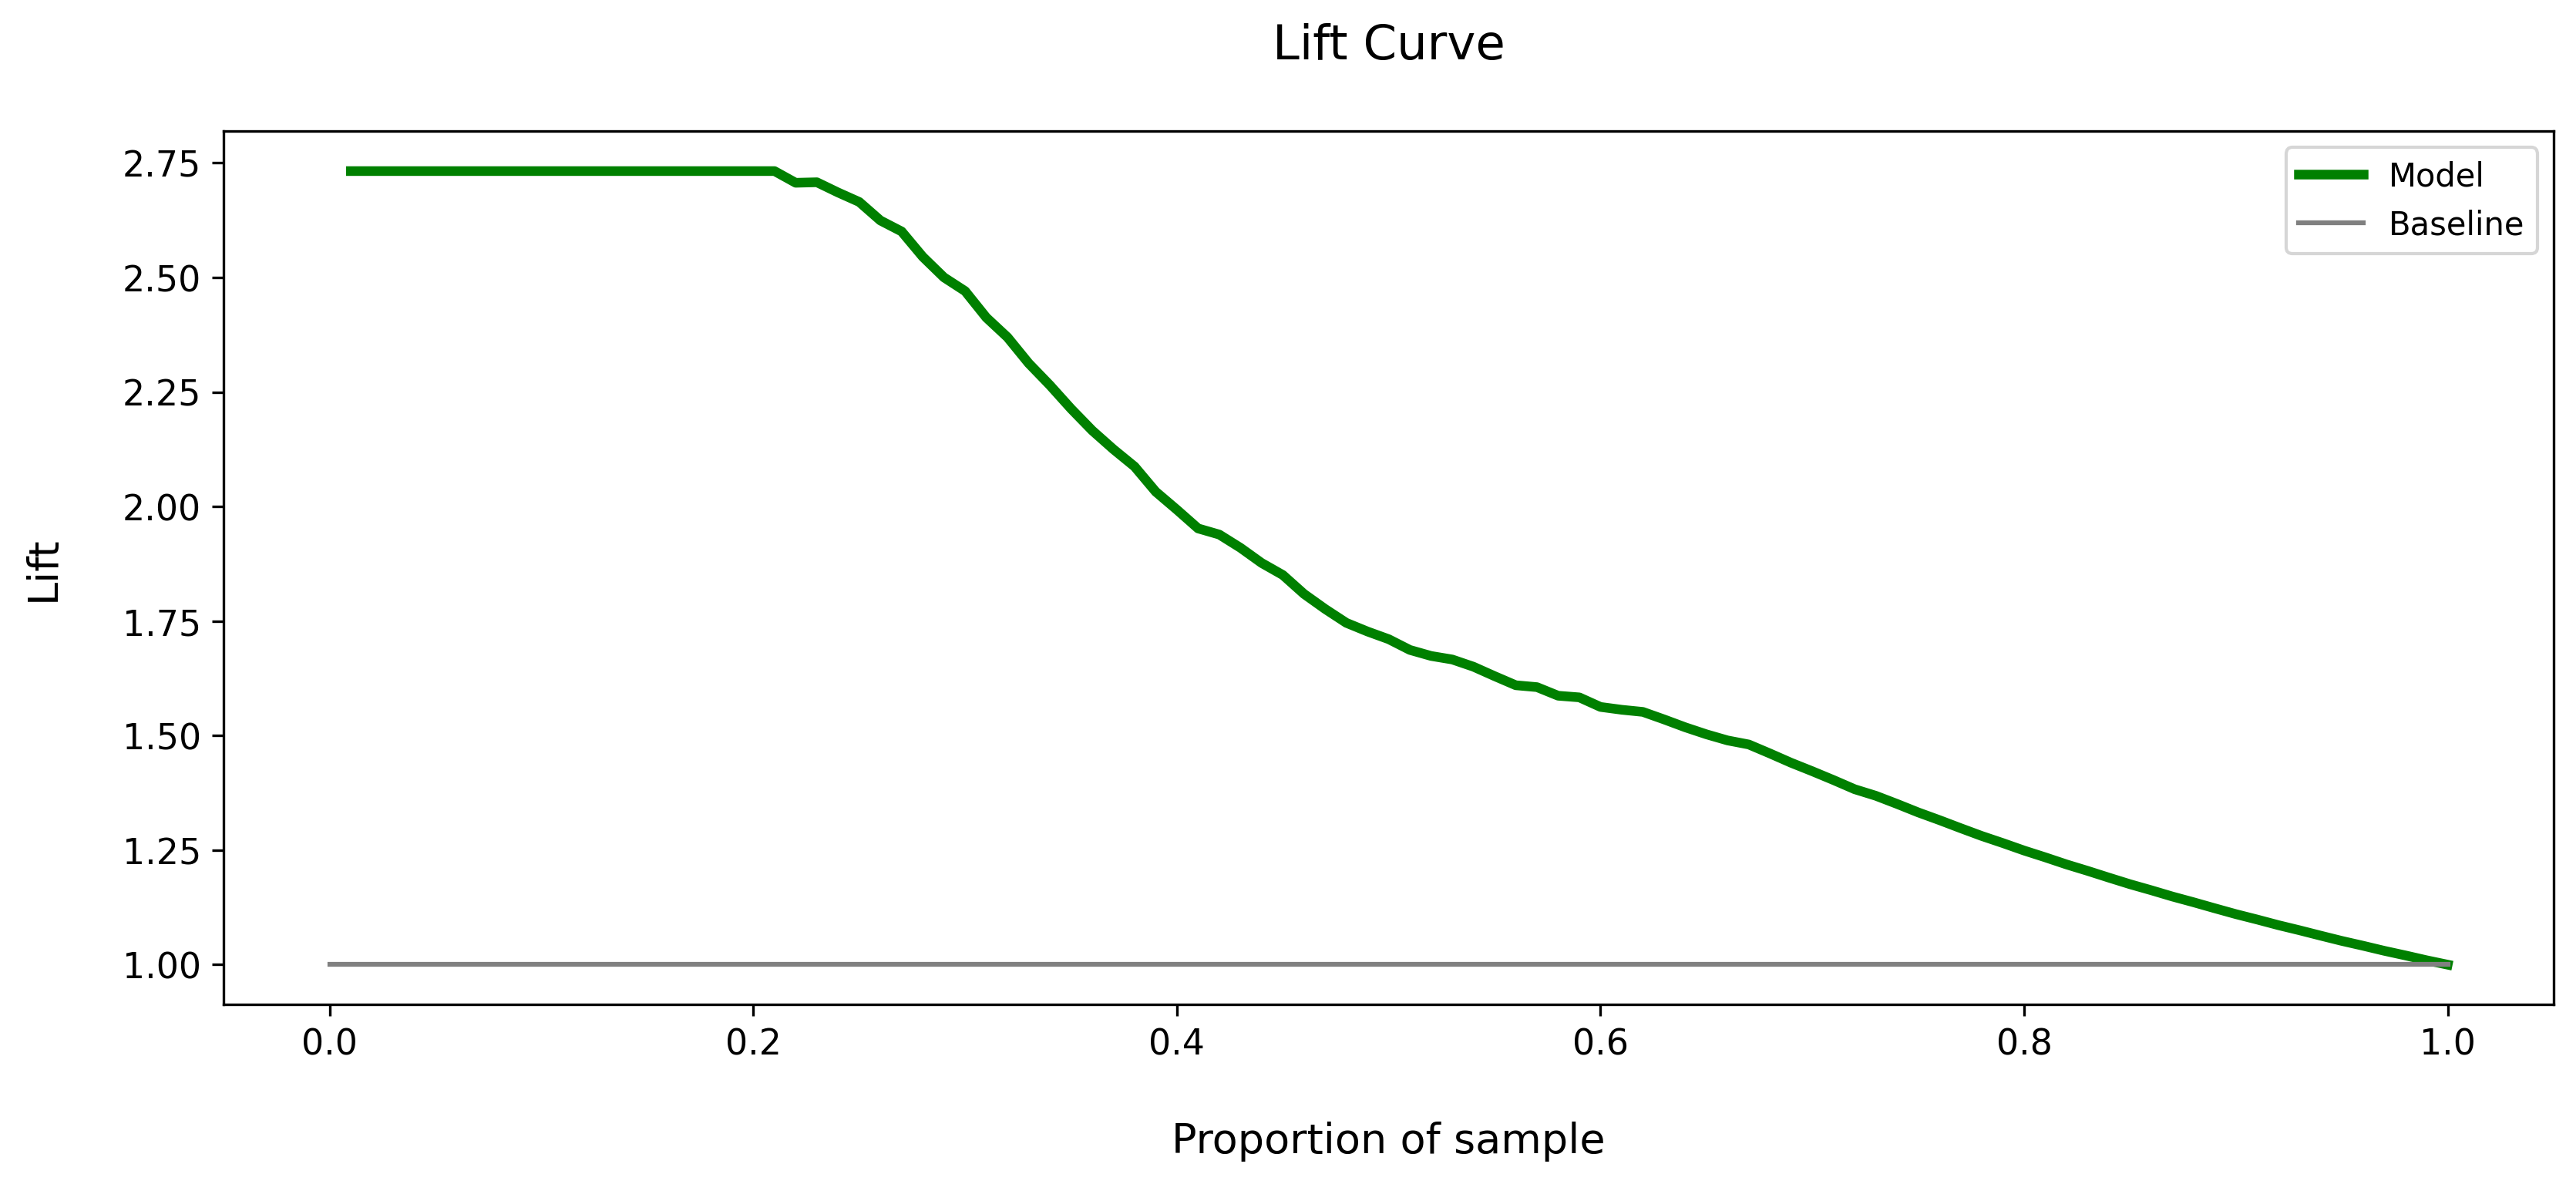

In [14]:
y_pred = forest.predict_proba(X_test)
plot_lift_curve(y_test, y_pred[:,1])

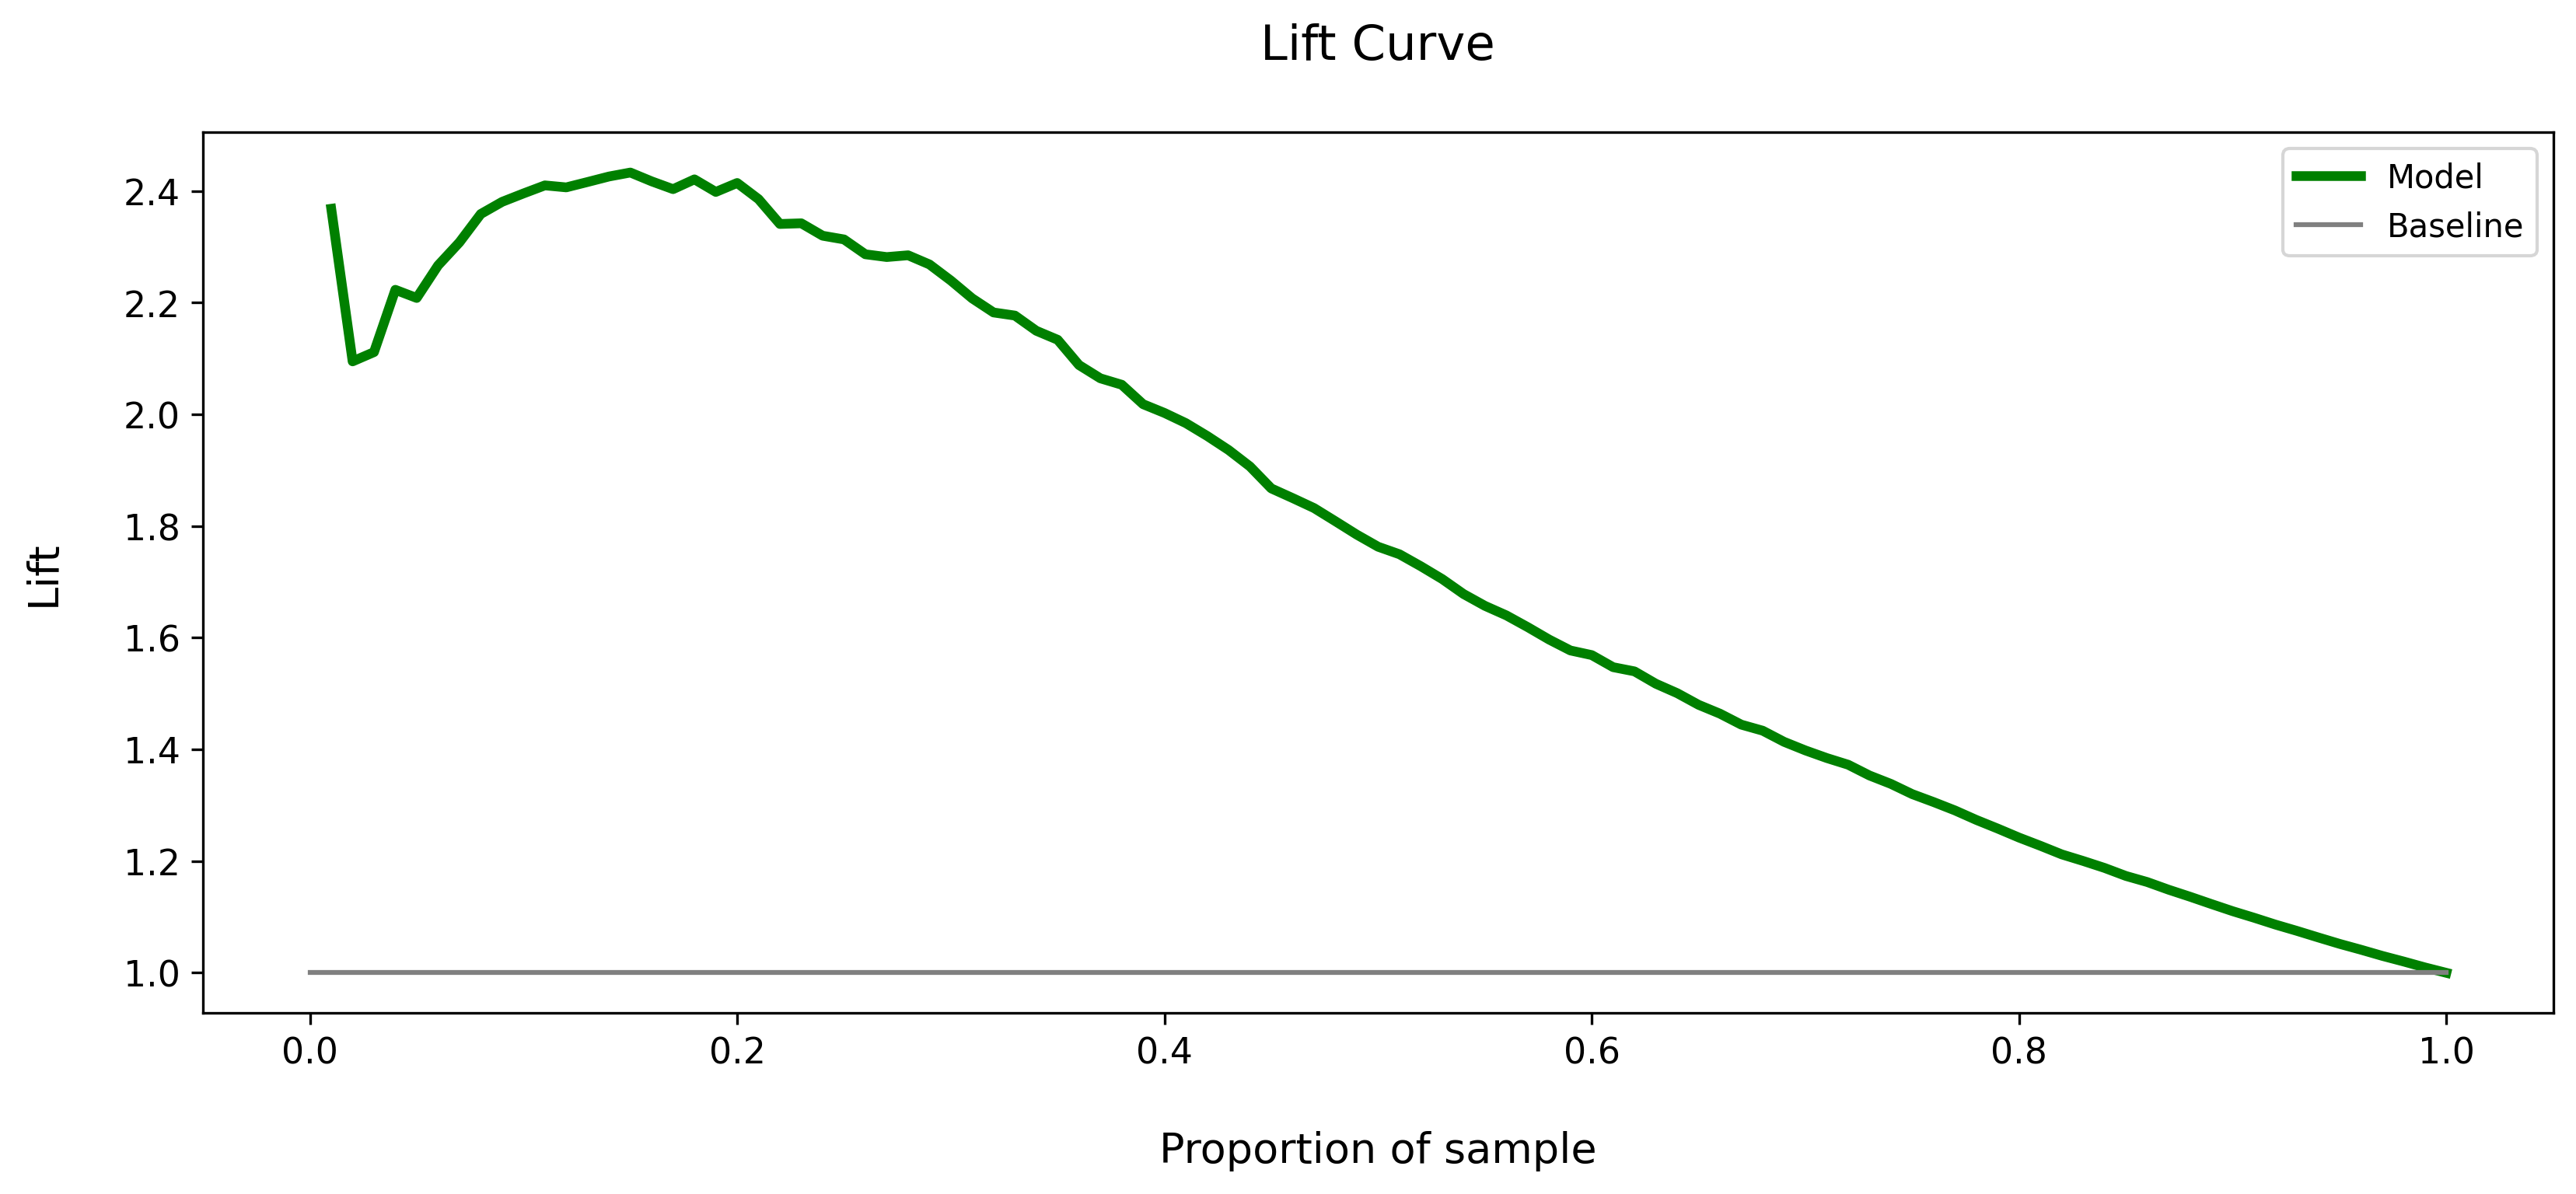

In [15]:
y_pred = boost.predict_proba(X_test)
plot_lift_curve(y_test, y_pred[:,1])

In [16]:
def calculate_lift(y_val, y_pred):
    from pandas import DataFrame
    from numpy import ceil, arange
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = DataFrame()
    aux_lift['true'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    
    #Create the values that will go into the X axis of our plot
    xval = arange(0.01,1.01,0.01) #create sequnence of values from 0.01 to 1.00 in steps of 0.01
    lift = [] #create empty list for storing lift values
    
    #Calculate the total ratio of true events in the data
    ratio_true_events_total = aux_lift['true'].sum() / len(aux_lift)
    
    #Calculate lift for each x value its correspondent y value
    for x in xval:
        index_xval = int(ceil(x*len(aux_lift))) #get index at specific value of x
        dataframe_xval = aux_lift.iloc[:index_xval,:]   #subset dataframe from 0 to index_val
        lift_xval = dataframe_xval['true'].sum()/len(dataframe_xval) #calculate lift for subset
        lift.append(lift_xval / ratio_true_events_total) #store results
    
    return (DataFrame({"Lift":lift, "ProportionSample":xval}))



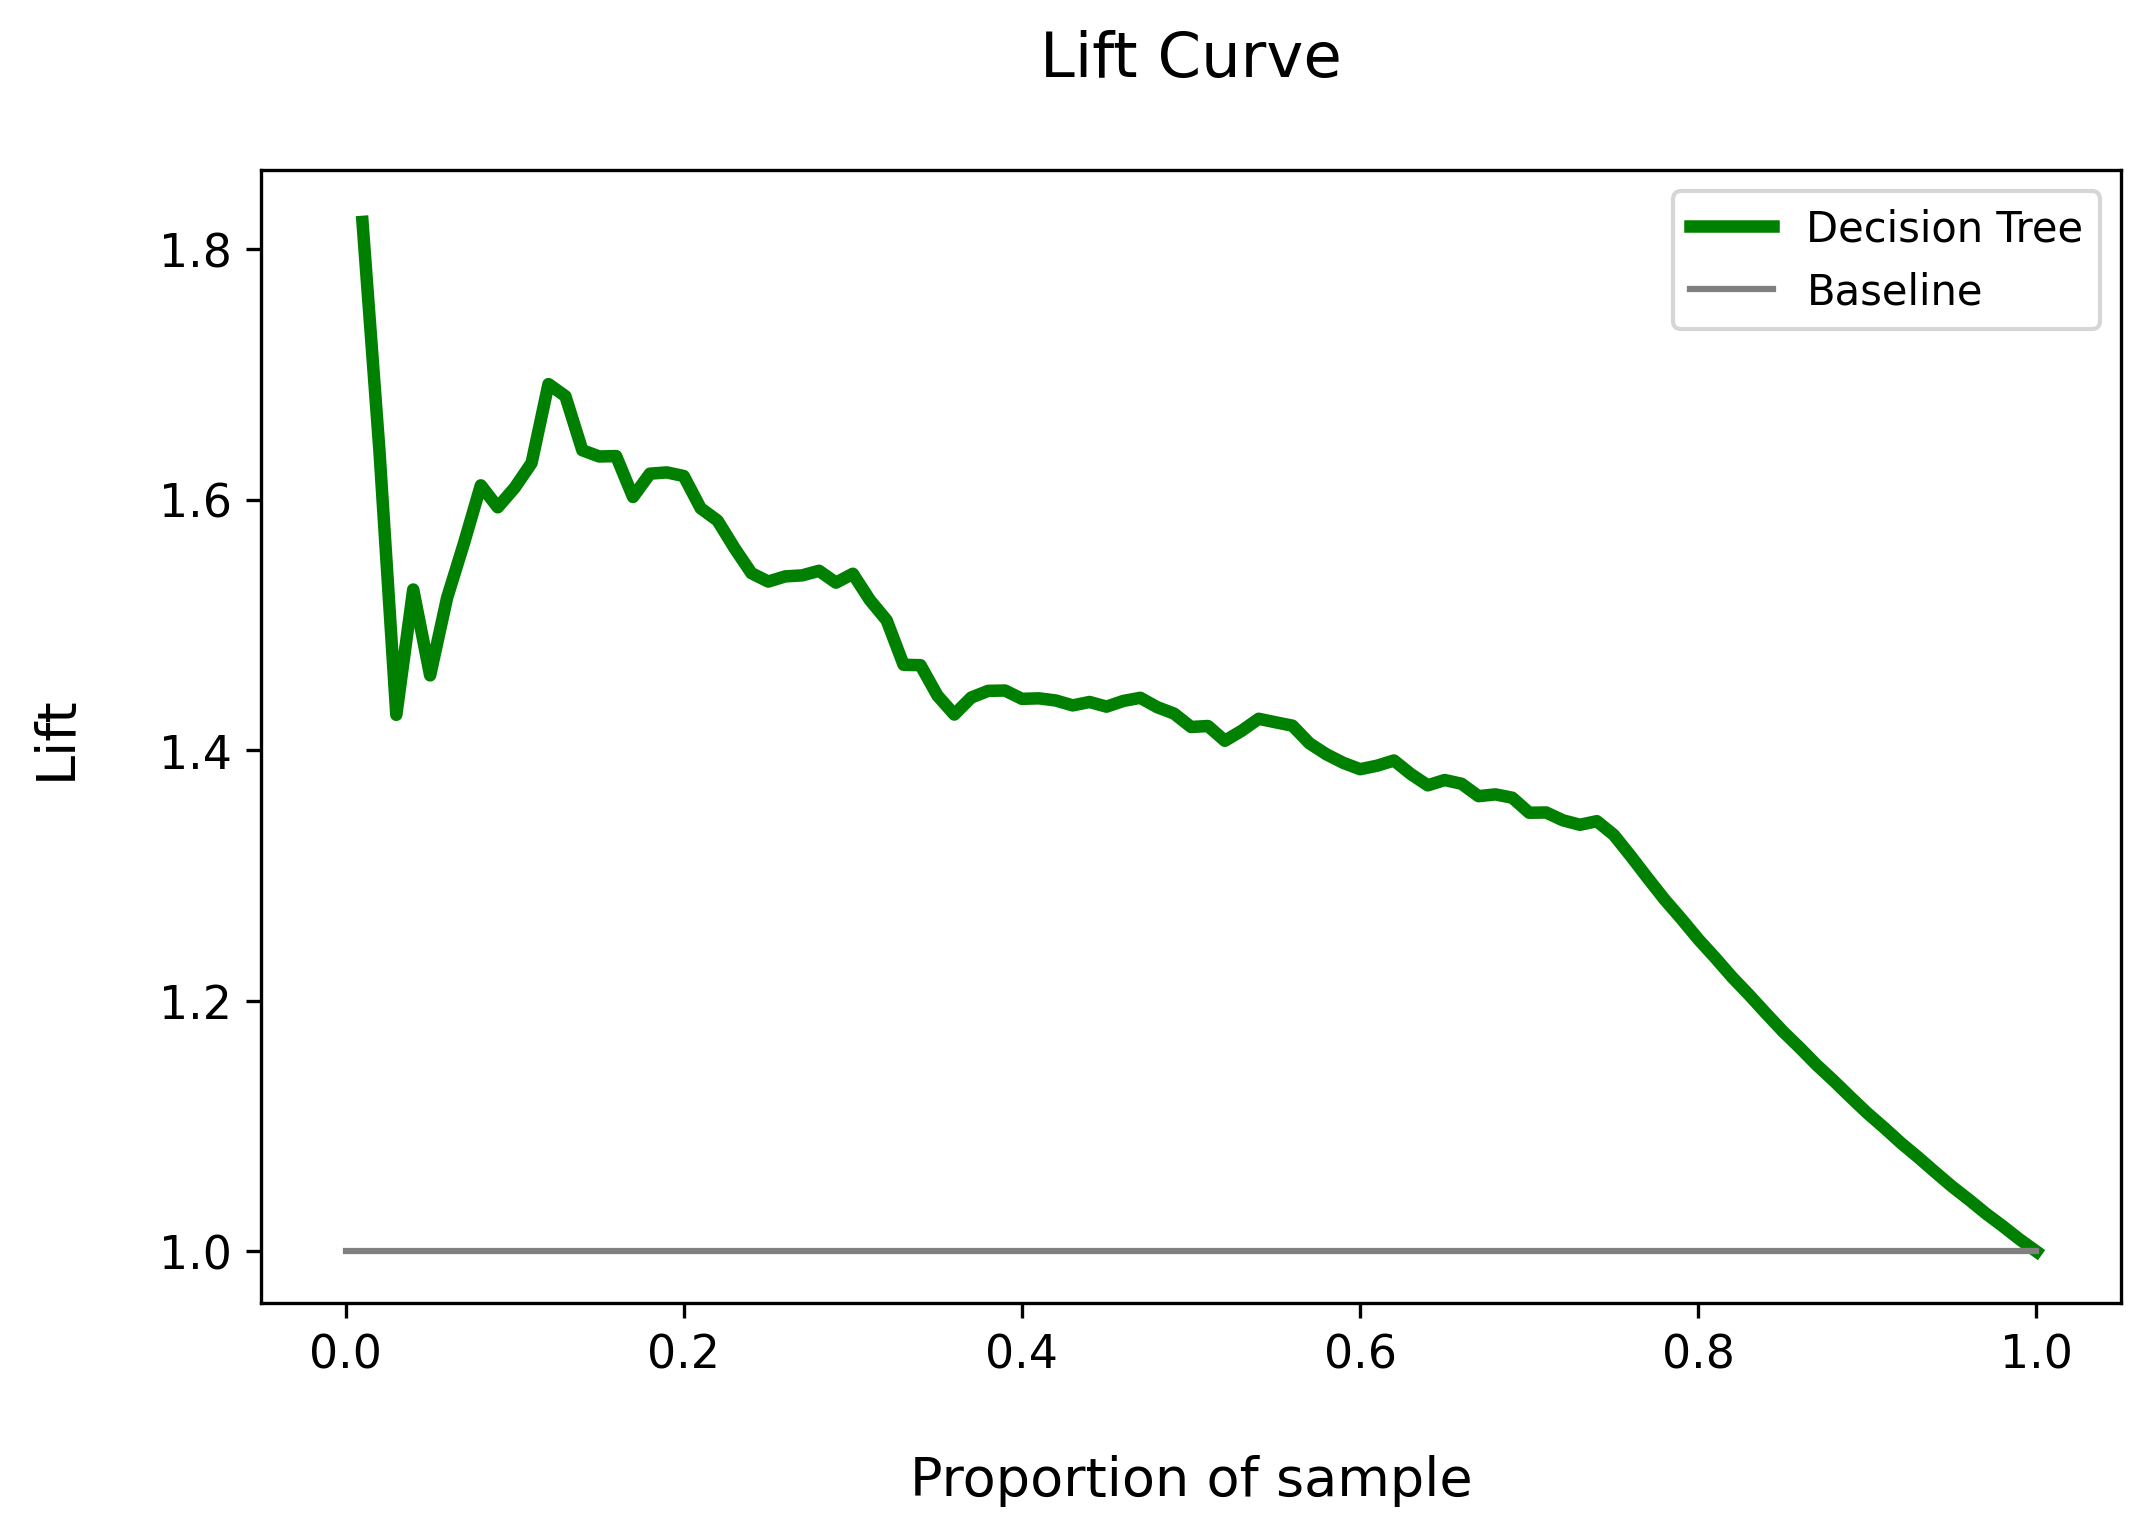

In [19]:
import matplotlib.pyplot as plt
lift_tree = calculate_lift (y_test, tree_educatedguess.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize = (8,5), dpi=300)
ax.plot(lift_tree["ProportionSample"],lift_tree["Lift"], color='green', linewidth = 3, label = "Decision Tree")
ax.plot([0,1],[1,1],color="grey", label="Baseline")
ax.set_xlabel('\nProportion of sample', fontsize=13)
ax.set_ylabel('Lift\n', fontsize=13)
ax.set_title('Lift Curve\n', fontsize=15)

ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.legend()

plt.savefig(path + "plots/lift_tree.jpg", bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
lift_tree = calculate_lift (y_test, tree_educatedguess.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize = (8,5), dpi=300)
ax.plot(lift_tree["ProportionSample"],lift_tree["Lift"], color='green', linewidth = 3, label = "Decision Tree")
ax.plot([0,1],[1,1],color="grey", label="Baseline")
ax.set_xlabel('\nProportion of sample', fontsize=13)
ax.set_ylabel('Lift\n', fontsize=13)
ax.set_title('Lift Curve\n', fontsize=15)

ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.legend()

plt.savefig(path + "plots/lift_forest.jpg", bbox_inches="tight")
plt.show()

## Expected Value of Models

Define value of business outcomes 

In [16]:
value_true_positive = 186
value_false_positive = -30

Define Function for Scoring Model:

In [17]:
def calculate_expected_value_model(matrix, value_true_positive, value_false_positive):
  """ works only for confusion matrices in specified form """

  #calculate prior probability of positive class
  p_prior_pos = matrix[1,:].sum() / matrix.sum() 
  
   #calculate conditional probabilities
  p_neg_instances = matrix[0,:]/matrix[0,:].sum()
  p_pos_instances = matrix[1,:]/matrix[1,:].sum() 

  # calculate expected values
  pos = p_prior_pos * (value_true_positive * p_pos_instances[1] + 0 * p_pos_instances[0])
  neg = (1 - p_prior_pos) * (value_false_positive * p_neg_instances[1] + 0 * p_neg_instances[0])
  return round(pos + neg, 2)

Get Expected Value for each contacted customer for random forest:

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
calculate_expected_value_model(matrix, value_true_positive, value_false_positive)

51.29

Get Expected Value for each contacted customer for decision tree:

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = tree_educatedguess.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
calculate_expected_value_model(matrix, value_true_positive, value_false_positive)

29.07

## Get threshold probability

In [21]:
def calculate_targeting_threshold(value_true_positive, value_false_positive):
    from sympy.solvers import solve
    from sympy import Symbol
    x = Symbol("x")
    p = solve(x*value_true_positive + (1-x)*value_false_positive, x)
    return float(p[0])

In [22]:
calculate_targeting_threshold(value_true_positive, value_false_positive)

0.1388888888888889